The data set comes from an online source here: https://archive.ics.uci.edu/ml/datasets/Online%20Retail

In [1]:
import pandas as pd

In [2]:
excel_file = 'Online_Retail.xlsx'

In [3]:
df = pd.read_excel(excel_file)

THIS ANSWER CHANGES BELOW AFTER I CLEAN THE DATA. (Which you will see below)  HOWEVER, THIS IS THE ANSWER TO THE FIRST QUESTION WITHOUT CLEANING.  I DID NOT KNOW IF THAT WAS NECESSARY FOR THE ASSIGNMENT OR NOT.  THANK YOU!

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
product_grouping = df.groupby('Description').sum().reset_index()

In [6]:
product_grouping.sort_values('Quantity', ascending=False).head(5)

,Description,Quantity,UnitPrice,CustomerID
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847,173.39,7297844.0
1866,JUMBO BAG RED RETROSPOT,47363,5333.30,25396253.0
244,ASSORTED COLOUR BIRD ORNAMENT,36381,2584.77,21602517.0
2740,POPCORN HOLDER,36334,874.50,10688216.0
2395,PACK OF 72 RETROSPOT CAKE CASES,36039,1047.04,16309247.0


MOVING ON TO CLEANING DATA

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
df.shape

(541909, 8)

In [9]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

This dataset has 541909 rows and 8 columns. There are missing values in the CustomerID and Description columns.  There are negative values in the Quantitiy and UnitPrice.

**We will tackle these four column issues:** 

    Negative Quantity
    Negative UnitPrice
    Null Customer ID
    Null Description

**Negative Quantity**
The Quantity column has negative values which is either a mistake or could be accounts that needed to be refunded.

In [13]:
df.Quantity.sort_values().min()

-80995

In [14]:
negative_quantity = df[df['Quantity']<0]

In [15]:
negative_quantity.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [16]:
negative_quantity.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom
541717,C581569,20979,36 PENCILS TUBE RED RETROSPOT,-5,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Notice that the InvoiceNo number has a "C" in front of it.  It may be that these orders were canceled.  We will keep a df of all the canceled orders for later analysis and remove them from the working dataframe.

In [17]:
cancelled_orders = df[df['Quantity']<0]

In [18]:
df = df[df['Quantity']>0]

In [19]:
df.shape

(531285, 8)

In [20]:
len(cancelled_orders)

10624

**Negative UnitPrice** could have been a product of negative Quantity, but we check again.

In [21]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [22]:
negative_unitprice = df[df['UnitPrice']<0]

In [23]:
negative_unitprice.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [24]:
len(negative_unitprice)

2

In [25]:
df[df['InvoiceNo'].astype(str).str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [26]:
df[df['Description'].astype(str).str.contains('Adjust bad debt')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Notice that the InvoiceNo number has a "A" in front of it. These orders are adjusted and need further analysis. We will keep a df of all the 'adjusted' and remove them from the working dataframe.

In [27]:
adjusted_bad_debt = df[df['InvoiceNo'].astype(str).str.contains('A')]

In [28]:
df[df['InvoiceNo'].astype(str).str.contains('A')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


There might be further edge cases in the data concerning StockCode.  We would need to further explore this, but will continue with the working dataframe.

In [29]:
df = df[df['UnitPrice']>0]

**CustomerID** column has null values which is either a mistake or something further

In [30]:
print("There are", df.CustomerID.isnull().sum(), "NULL Customer IDs")

There are 132220 NULL Customer IDs


In [31]:
customer_ID_null = df[df['CustomerID'].isnull()]

In [32]:
customer_ID_null.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [33]:
customer_ID_null.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom


In [34]:
print(round(df['CustomerID'].isnull().sum() * 100 / len(df),2),"%", "of the CustomerID data is NULL")

24.94 % of the CustomerID data is NULL


Approximately 25% of the CusterID's are NULL.  This could mean that they were input by a process that didn't accept a customer ID, cash sales, or some other issue.  We will remove these from the current dataframe as we are focused on online sales and this could complicate our results.

In [35]:
df = df.dropna(subset=['CustomerID'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      397884 non-null object
StockCode      397884 non-null object
Description    397884 non-null object
Quantity       397884 non-null int64
InvoiceDate    397884 non-null datetime64[ns]
UnitPrice      397884 non-null float64
CustomerID     397884 non-null float64
Country        397884 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


**NULL Description** entries could have been taken care of by the previous cleaning.

In [37]:
df.Description.isnull().sum()

0

**THE FIRST QUESTION ASKS: What products do our customers like to buy?**

We will create a Sales Order Amount in order to find the total price of a batch of products.

****MAKE SURE TO CHECK THE NULL CUSTOMER DATA IN FUTURE WITH FURTHER CODE****

In [38]:
df['SalesOrderAmt'] = df.Quantity * df.UnitPrice

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SalesOrderAmt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [40]:
product_grouping = df.groupby('Description').sum().reset_index()

In [41]:
product_grouping.sort_values('Quantity', ascending=False).head(5)

,Description,Quantity,UnitPrice,CustomerID,SalesOrderAmt
2319,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916,241.62,3047321.0,81416.73
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415,138.40,7226036.0,13586.25
1762,JUMBO BAG RED RETROSPOT,46181,3261.69,24748363.0,85220.78
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725,5867.22,31562068.0,100448.15


In [42]:
product_grouping.sort_values('SalesOrderAmt', ascending=False).head(5)

,Description,Quantity,UnitPrice,CustomerID,SalesOrderAmt
2319,"PAPER CRAFT , LITTLE BIRDIE",80995,2.08,16446.0,168469.60
2767,REGENCY CAKESTAND 3 TIER,12402,21508.90,25791979.0,142592.95
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725,5867.22,31562068.0,100448.15
1762,JUMBO BAG RED RETROSPOT,46181,3261.69,24748363.0,85220.78
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916,241.62,3047321.0,81416.73


The **Little Birdie Paper Craft** is both the most ordered product Quantity and the Total Dollars.

**THE SECOND QUESTION ASKS: People from which country spend the most on this website?**


In [43]:
import matplotlib.pyplot as plt

In [44]:
group_country_orders = df.groupby('Country')['InvoiceNo'].count().sort_values()

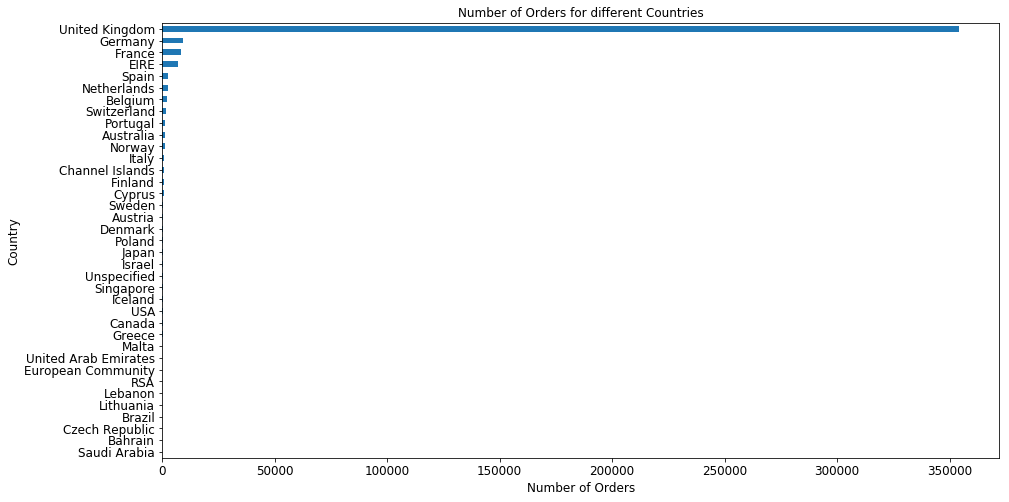

In [45]:
plt.subplots(figsize=(15,8))
group_country_orders.plot('barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

Most of the Invoices or sales orders comes from the UK by a wide margin

In [46]:
country_spending = df.groupby('Country').sum().reset_index()
country_spending.sort_values('SalesOrderAmt', ascending=False).head(5)

,Country,Quantity,UnitPrice,CustomerID,SalesOrderAmt
35,United Kingdom,4256740,1.050205e+06,5.510573e+09,7.308392e+06
23,Netherlands,200361,6.247730e+03,3.402037e+07,2.854463e+05
10,EIRE,140275,3.217928e+04,1.066949e+08,2.655459e+05
14,Germany,119261,3.353214e+04,1.143471e+08,2.288671e+05
13,France,111471,3.683204e+04,1.057506e+08,2.090240e+05


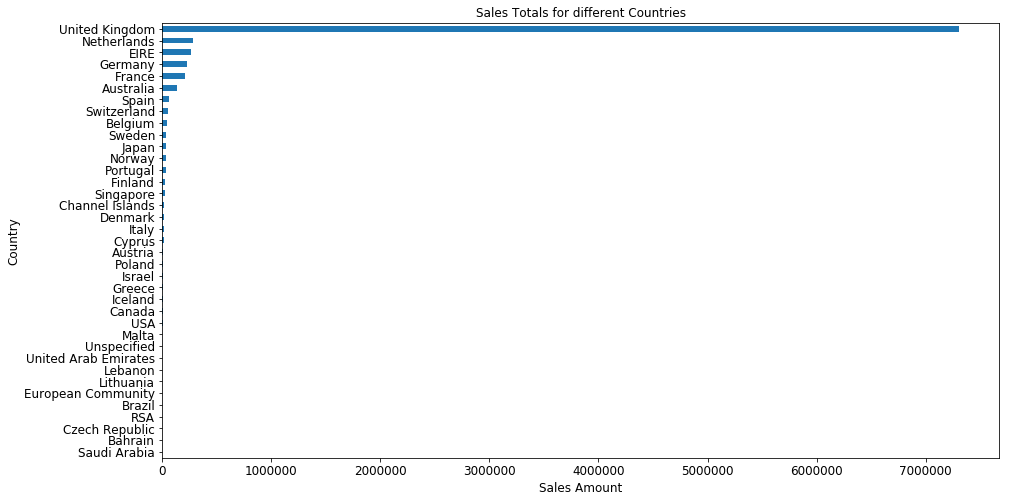

In [118]:
group_country_spending = df.groupby('Country')['SalesOrderAmt'].sum().sort_values()
plt.subplots(figsize=(15,8))
group_country_spending.plot('barh', fontsize=12)
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Sales Totals for different Countries', fontsize=12)
plt.show()

The highest combined sales order totals also comes from the UK by a wide margin.  THIS ANSWER WOULD BE THE SAME WHETHER DATA WAS CLEANED OR NOT.

**THE THIRD QUESTION ASKS: Make a list of countries and their most bought item**

In [47]:
country_product_grouping = df.groupby('Country')['Quantity'].max()

In [48]:
country_product_grouping.head()

Country
Australia    1152
Austria       288
Bahrain        96
Belgium       272
Brazil         24
Name: Quantity, dtype: int64

In [50]:
country_product_grouping2 = df.groupby(['Country']).sum()['Quantity'].sort_values(ascending=False)

Country
United Kingdom    4256740
Netherlands        200361
EIRE               140275
Germany            119261
France             111471
Name: Quantity, dtype: int64

In [30]:
group_country_orders = df.groupby('Country')['Quantity'].count().sort_values()